In [1]:
import numpy as np
def load_500(filename):
    """Originally implemented by Christian Breinholt"""
    AAs = [] #Amino acids labels
    DSSP = [] #DSSP symbol labels 
    angles = [] #Angles
    for line in filename.readlines():
        if "#" in line:
            continue
        elif "NT" in line:
            continue
        elif "CT" in line:
            continue
        else:
            line_i = line.split()
            AAs.append(line_i[0])           # AA label
            DSSP.append(line_i[1])          # DSSP label – helix, beta bulge, beta sheet etc. 
            angles.append(float(line_i[2])) # Phi 
            angles.append(float(line_i[3])) # Psi

    angles = np.array(angles)       
    angles = np.reshape(angles,((int(len(angles)/2)), 2)) #Reshaping angle array – line for each psi–phi pair
    return (angles, np.array(AAs), np.array(DSSP))

data = open("top500.txt")
top500 = load_500(data)
DSSP = top500[2].copy()
AAs = top500[1].copy()
top_angles = top500[0].copy()

In [2]:
def torus(angles, title, save = True, c = 2, a = 1.4, lim = 2.5):
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    n = 100
    theta = np.linspace(0, 2.*np.pi, n)
    phi = np.linspace(0, 2.*np.pi, n)
    theta, phi = np.meshgrid(theta, phi)

    x1 = (c + a*np.cos(theta)) * np.cos(phi)
    y1 = (c + a*np.cos(theta)) * np.sin(phi)
    z1 = a * np.sin(theta)

    fig = plt.figure()
    ax = fig.gca(projection='3d') 
    ax.set_zlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.set_xlim(-lim,lim)
    
    phi = angles[:,0]
    psi = angles[:,1]
    x = (c + a*np.cos(psi)) * np.cos(phi)
    y = (c + a*np.cos(psi)) * np.sin(phi)
    z = a * np.sin(psi)

    ax.plot_surface(x1, y1, z1, rstride=5, cstride=5, color='snow', edgecolors='snow', alpha = 0.3)
    ax.scatter(x, y, z, s=0.1, marker = ",", color="indigo", alpha = 0.3)
    ax.set_axis_off()
    
    if save: plt.savefig(title,  dpi=500) 
    else: plt.show()

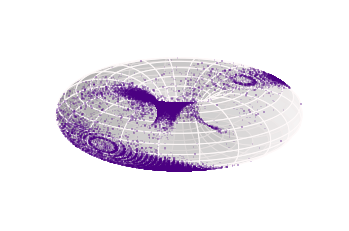

In [5]:
torus(top_angles, "")

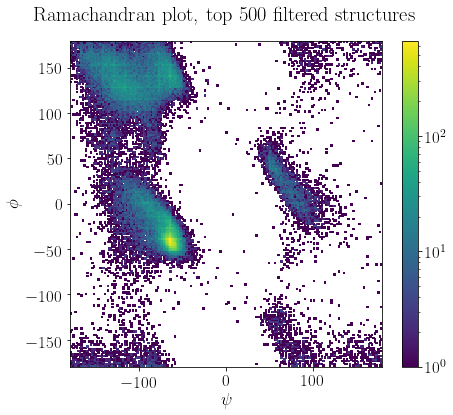

In [4]:
def Ramachandran_plot(data_angles, c, fname = None, title = None):
    import matplotlib.pyplot as plt
    from matplotlib.colors import LogNorm
    degrees = np.rad2deg(data_angles) 
    phi = degrees[:,0] 
    psi = degrees[:,1] 
    plt.figure(figsize=(7, 6))
    plt.hist2d(phi, psi, bins = 200, norm = LogNorm(), cmap = plt.cm.viridis )
    plt.title(title) 
    plt.xlabel('$\psi$')
    plt.ylabel('$\phi$')    
    plt.xlim(-c, c)
    plt.ylim(-c, c)
    plt.colorbar()
    if title is not None and fname is not None:
        plt.savefig(fname, dpi = 500, bbox_inches = 'tight')
    else:
        plt.show()
        
from matplotlib import rc
import matplotlib.pyplot as plt

rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rcParams['axes.titlepad'] = 20 
plt.rcParams.update({'font.size': 17})

Ramachandran_plot(top_angles, 180, "rama_plot", "Ramachandran plot, top 500 filtered structures")